# Data Meta-analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
csv = pd.read_csv('joinable_kc_dataset.csv')
df = pd.DataFrame(csv)

In [3]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'lat_group', 'long_group',
       'lat+long_group'],
      dtype='object')

### What are the most and least valuable neighborhoods?
- create new price per square foot (PPSF) column in the dataframe
- groupby lat+long_group
- return mean of each neighborhood PPSF from the groupby object
    - set this as a new dataframe
- find maximum row
- find minimum row
- draw a .5 mile radius circle around each
    - high in red
    - low in blue

In [4]:
df['price_per_sqft'] = df['price']/df['sqft_living']
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,price_per_sqft
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999",188.050847
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,47.716540,-122.309,"47.71654017857156,-122.3089999999999",209.338521
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,47.738744,-122.225,"47.73874375000014,-122.2249999999999",233.766234
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,47.516708,-122.393,"47.51670803571437,-122.393",308.163265
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,47.616624,-122.057,"47.61662410714297,-122.0569999999999",303.571429


In [5]:
areas = df.groupby('lat+long_group')
av_ppsqft = pd.DataFrame(areas['price_per_sqft'].mean().reset_index())
av_ppsqft.head()

,lat+long_group,price_per_sqft
0,"47.15034910714286,-121.6369999999998",204.301075
1,"47.16145089285715,-121.9449999999999",156.136364
2,"47.16145089285715,-121.9729999999999",242.086783
3,"47.17255267857144,-121.9449999999999",209.708738
4,"47.17255267857144,-122.0009999999999",150.326797


In [6]:
print('Lat, Long Center of Highest PPsqft area:\n', av_ppsqft.iloc[(av_ppsqft['price_per_sqft'].idxmax())])

Lat, Long Center of Highest PPsqft area:
 lat+long_group    47.69433660714299,-122.2529999999999
price_per_sqft                                 694.878
Name: 723, dtype: object


In [7]:
print('Lat, Long Center of Highest PPsqft area:\n', av_ppsqft.iloc[(av_ppsqft['price_per_sqft'].idxmin())])

Lat, Long Center of Highest PPsqft area:
 lat+long_group    47.28357053571432,-122.1689999999999
price_per_sqft                                  99.963
Name: 66, dtype: object


Plugging in these two latitudes and longitudes into google maps, we get the two following neighborhood names:
- Highest average PPsqft area: Shorelines of Sand Point and Inglewood-Finn Hill (\$695 / sqft)
    - Below in green
- Lowest average PPsqft area: Southeast Auburn (\$100 / sqft)
    - Below in blue

In [8]:
print('../DreamTeam/highest_and_lowest_areas.png')

../DreamTeam/highest_and_lowest_areas.png


![title](highest_and_lowest_areas.png "ShowMyImage")

### How many properties sold each month?

- Parse date of sale to extract year, month in separate columns
- groupby year, month
    - get total count of records for each group
    - plot as line graph

In [9]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,price_per_sqft
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,0,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999",188.050847
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,1991,98125,47.7210,-122.319,1690,7639,47.716540,-122.309,"47.71654017857156,-122.3089999999999",209.338521
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,0,98028,47.7379,-122.233,2720,8062,47.738744,-122.225,"47.73874375000014,-122.2249999999999",233.766234
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,0,98136,47.5208,-122.393,1360,5000,47.516708,-122.393,"47.51670803571437,-122.393",308.163265
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,0,98074,47.6168,-122.045,1800,7503,47.616624,-122.057,"47.61662410714297,-122.0569999999999",303.571429


In [10]:
df['year_month'] = df['date'].str[0:6]
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,zipcode,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,price_per_sqft,year_month
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,98178,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999",188.050847,201410
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,98125,47.7210,-122.319,1690,7639,47.716540,-122.309,"47.71654017857156,-122.3089999999999",209.338521,201412
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,98028,47.7379,-122.233,2720,8062,47.738744,-122.225,"47.73874375000014,-122.2249999999999",233.766234,201502
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,98136,47.5208,-122.393,1360,5000,47.516708,-122.393,"47.51670803571437,-122.393",308.163265,201412
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,98074,47.6168,-122.045,1800,7503,47.616624,-122.057,"47.61662410714297,-122.0569999999999",303.571429,201502


In [11]:
timegroup = df.groupby('year_month')
timeframe = pd.DataFrame(timegroup.id.count().reset_index())
timeframe.head()

,year_month,id
0,201405,1768
1,201406,2180
2,201407,2211
3,201408,1937
4,201409,1773


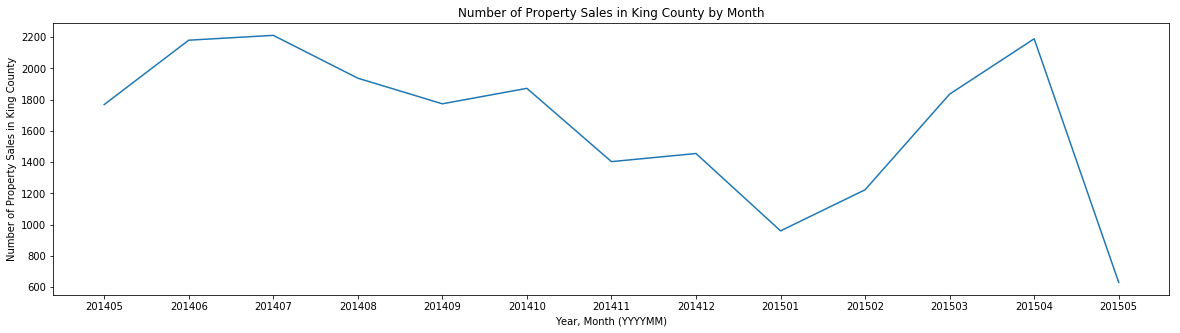

In [12]:
plt.figure(figsize=(20,5))
x = np.arange(0, len(timeframe), 1)
plt.plot(x, timeframe['id'])
plt.xticks(x, timeframe['year_month'])
plt.title("Number of Property Sales in King County by Month")
plt.xlabel('Year, Month (YYYYMM)')
plt.ylabel('Number of Property Sales in King County')
plt.show()

### How did average price per square foot fluctuate over time?

- Same analysis as above, but for price per square foot column:

In [13]:
timeframe2 = pd.DataFrame(timegroup['price_per_sqft'].mean().reset_index())
timeframe2.head()

,year_month,price_per_sqft
0,201405,263.511893
1,201406,264.854879
2,201407,259.691581
3,201408,259.837879
4,201409,259.640026


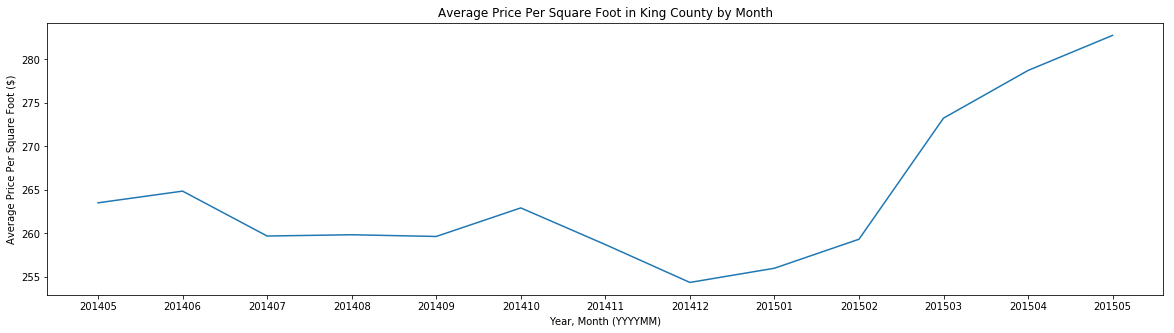

In [14]:
plt.figure(figsize=(20,5))
x = np.arange(0, len(timeframe), 1)
plt.plot(x, timeframe2['price_per_sqft'])
plt.xticks(x, timeframe2['year_month'])
plt.title("Average Price Per Square Foot in King County by Month")
plt.xlabel('Year, Month (YYYYMM)')
plt.ylabel('Average Price Per Square Foot ($)')
plt.show()

### How many properties were sold in each \$100,000 price range?

- Bin home sale price, bin width of 100,000
- Plot as histogram

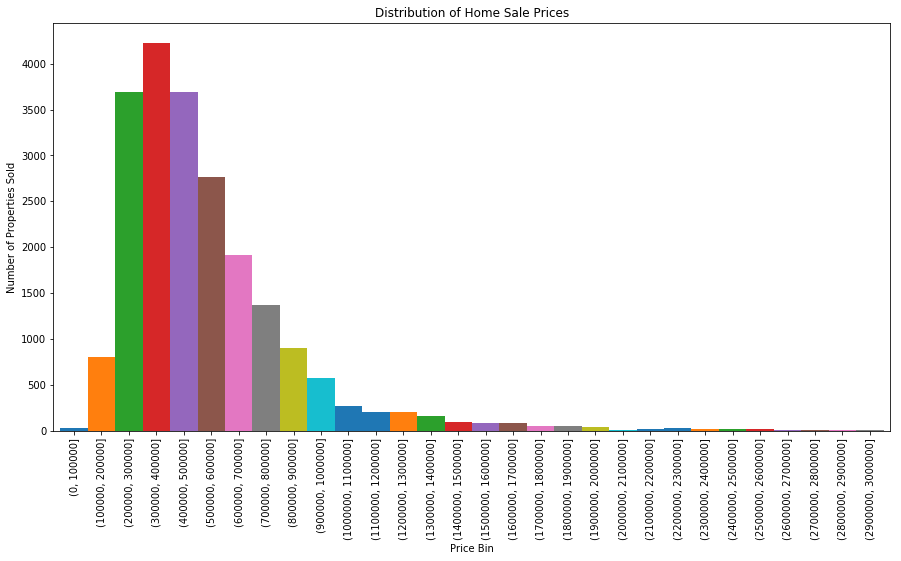

In [15]:
bins = [0,
        100000,
        200000,
        300000,
        400000,
        500000,
        600000,
        700000,
        800000,
        900000,
       1000000,
       1100000,
       1200000,
       1300000,
       1400000,
       1500000,
       1600000,
       1700000,
       1800000,
       1900000,
       2000000,
       2100000,
       2200000,
       2300000,
       2400000,
       2500000,
       2600000,
       2700000,
       2800000,
       2900000,
       3000000]
df2 = df.groupby(pd.cut(df['price'], bins=bins)).price.count()
plt.figure(figsize=(15,7.5))
df2.plot(kind='bar', width=1)
plt.title('Distribution of Home Sale Prices')
plt.xlabel('Price Bin')
plt.ylabel('Number of Properties Sold')
plt.show()

### Which bedroom amount has the highest price per square foot?
- Group the dataframe on number of bedrooms
- return the mean price per square foot for each bedroom amount
- bar chart it

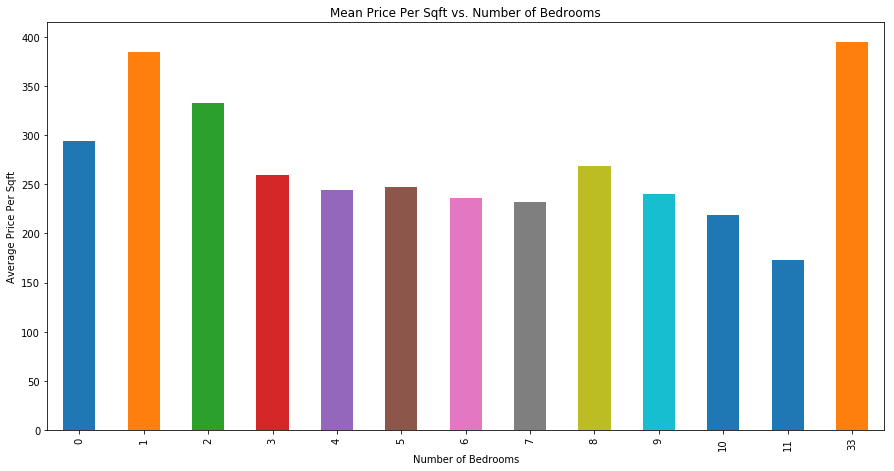

In [16]:
bedgroup = df.groupby('bedrooms')
df3 = bedgroup['price_per_sqft'].mean()
plt.figure(figsize=(15,7.5))
df3.plot(kind='bar')
plt.title('Mean Price Per Sqft vs. Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Price Per Sqft')
plt.show()

### Where does the premium on newness stop?
#### That is, how does year built (or renovated) correlate with both price and price per sqft?
- Create a new calculated column for age of house
    - If the house is renovated, we will take that as the built year instead.
- Plot a line chart with price per square foot vs. age

In [17]:
df4 = pd.DataFrame()
df4['age'] = ''
df4.head()

,age


In [18]:
for index, row in df.iterrows():
    if row['yr_renovated'] != 0:
        year = row['yr_renovated']
    else:
        year = row['yr_built']
    now = int(row['date'][0:4])
    age = int(now - year)
    df4.set_value(index, 'age', age)

/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:8: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead
  


In [19]:
df4.head()

,age
0,59.0
1,23.0
2,82.0
3,49.0
4,28.0


In [20]:
df5 = df.join(df4['age'], how='outer')
df5.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,lat,long,sqft_living15,sqft_lot15,lat_group,long_group,lat+long_group,price_per_sqft,year_month,age
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,47.5112,-122.257,1340,5650,47.516708,-122.253,"47.51670803571437,-122.2529999999999",188.050847,201410,59.0
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,47.7210,-122.319,1690,7639,47.716540,-122.309,"47.71654017857156,-122.3089999999999",209.338521,201412,23.0
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,47.7379,-122.233,2720,8062,47.738744,-122.225,"47.73874375000014,-122.2249999999999",233.766234,201502,82.0
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,47.5208,-122.393,1360,5000,47.516708,-122.393,"47.51670803571437,-122.393",308.163265,201412,49.0
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,47.6168,-122.045,1800,7503,47.616624,-122.057,"47.61662410714297,-122.0569999999999",303.571429,201502,28.0


In [21]:
age_group = df5.groupby('age')
df6 = pd.DataFrame(age_group['price'].mean())

In [22]:
df6.head()

,price
age,
-1.0,522989.222222
0.0,685312.874031
1.0,684327.530303
2.0,592684.260638
3.0,555586.802260


In [23]:
df5['age'].max()

115.0

In [24]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 24
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

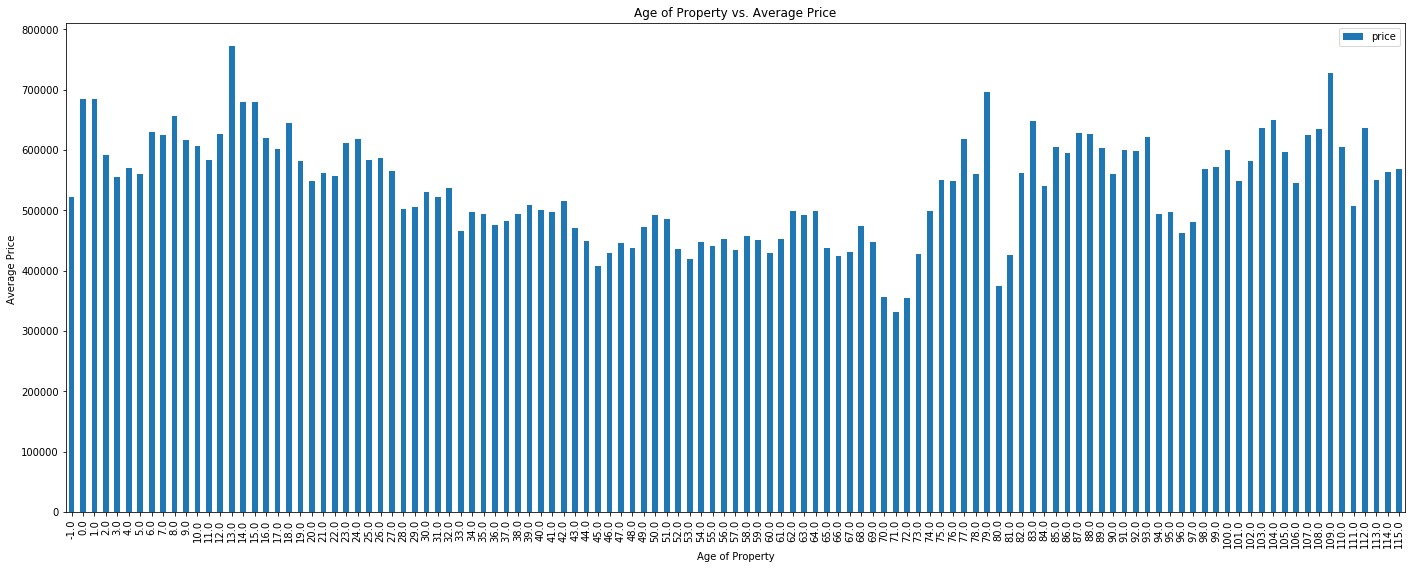

In [25]:
df6.plot(kind='bar')
plt.title('Age of Property vs. Average Price')
plt.xlabel('Age of Property')
plt.ylabel('Average Price ')
plt.show()

#### Same analysis, but with price per square feet instead of price:

In [26]:
df7 = pd.DataFrame(age_group['price_per_sqft'].mean())

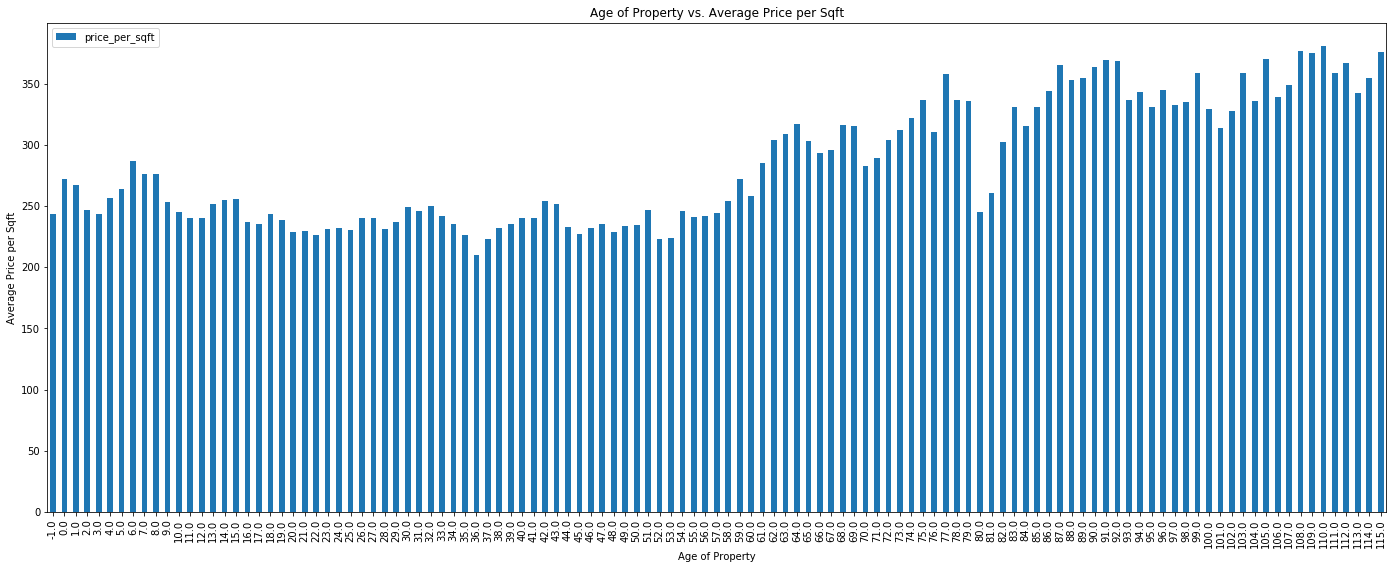

In [27]:
df7.plot(kind='bar')
plt.title('Age of Property vs. Average Price per Sqft')
plt.xlabel('Age of Property')
plt.ylabel('Average Price per Sqft')
plt.show()